In [406]:
import os
import math
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [407]:
%matplotlib inline

In [408]:
import warnings
warnings.filterwarnings('ignore')

In [616]:
telecom = pd.read_csv('ACMETelephoneABT.csv')

In [617]:
telecom.head()

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1000004,26,crafts,town,yes,true,6,1,1812,false,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,false
1,1000012,36,,,yes,true,9,4,544,true,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,false
2,1000034,74,professional,town,yes,false,7,2,138,true,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,false
3,1000063,30,,suburban,no,false,6,3,122,true,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,false
4,1000085,32,,town,yes,false,7,8,10,true,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,false


In [618]:
telecom.shape

(10000, 33)

In [619]:
telecom.dtypes

customer                        int64
 age                            int64
 occupation                    object
 regionType                    object
marriageStatus                 object
 children                      object
 income                         int64
numHandsets                     int64
handsetAge                      int64
smartPhone                     object
currentHandsetPrice           float64
 creditRating                  object
homeOwner                      object
 creditCard                    object
avgBill                       float64
avgMins                       float64
avgrecurringCharge            float64
avgOverBundleMins             float64
avgRoamCalls                  float64
callMinutesChangePct          float64
billAmountChangePct           float64
avgReceivedMins               float64
avgOutCalls                   float64
avgInCalls                    float64
peakOffPeakRatio              float64
peakOffPeakRatioChangePct     float64
avgDroppedCa

In [620]:
telecom.columns

Index(['customer', ' age', ' occupation', ' regionType', 'marriageStatus',
       ' children', ' income', 'numHandsets', 'handsetAge', 'smartPhone',
       'currentHandsetPrice', ' creditRating', 'homeOwner', ' creditCard',
       'avgBill', 'avgMins', 'avgrecurringCharge', 'avgOverBundleMins',
       'avgRoamCalls', 'callMinutesChangePct', 'billAmountChangePct',
       'avgReceivedMins', 'avgOutCalls', 'avgInCalls', 'peakOffPeakRatio',
       'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lifeTime',
       'lastMonthCustomerCareCalls', 'numRetentionCalls',
       'numRetentionOffersAccepted', 'newFrequentNumbers', 'churn'],
      dtype='object')

In [621]:
# We notice that for some of the attributes such as age, occupation, income, etc. , there are spaces at the beginning of the
# column name. We will rename these specific columns to ones without the spaces for better readability later on.

In [622]:
telecom.rename(columns={' age': 'age', ' income': 'income', ' occupation': 'occupation', ' regionType': 'regionType', ' children': 'children', ' creditRating': 'creditRating', ' creditCard': 'creditCard' }, inplace=True)

In [623]:
telecom.columns

Index(['customer', 'age', 'occupation', 'regionType', 'marriageStatus',
       'children', 'income', 'numHandsets', 'handsetAge', 'smartPhone',
       'currentHandsetPrice', 'creditRating', 'homeOwner', 'creditCard',
       'avgBill', 'avgMins', 'avgrecurringCharge', 'avgOverBundleMins',
       'avgRoamCalls', 'callMinutesChangePct', 'billAmountChangePct',
       'avgReceivedMins', 'avgOutCalls', 'avgInCalls', 'peakOffPeakRatio',
       'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lifeTime',
       'lastMonthCustomerCareCalls', 'numRetentionCalls',
       'numRetentionOffersAccepted', 'newFrequentNumbers', 'churn'],
      dtype='object')

## Data Cleaning

In [624]:
# Let us first check the 'customer' data. These seem to CutomerID. To check if there are any repeating  values, we will use
# pd.nunique() function

In [625]:
telecom['customer'].nunique()

10000

In [626]:
# There are 10000 unique rows, which is same as the total numbe of rows in the dataset. Thus, every row in 'customer' attribute
# is unique and we dont need to further check for repeating customers.

In [627]:
# On eye-balling the dataset, we see that there are missing values in the dataset, represented by blank spaces. Using for loop,
# we will replace all the blank spaces in the dataset with numpy NaN.

In [628]:
for i in telecom.columns:
    telecom[i] = telecom[i].replace(" ", np.nan)

In [629]:
telecom.head(10)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1000004,26,crafts,town,yes,true,6,1,1812,false,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,false
1,1000012,36,NaN,NaN,yes,true,9,4,544,true,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,false
2,1000034,74,professional,town,yes,false,7,2,138,true,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,false
3,1000063,30,NaN,suburban,no,false,6,3,122,true,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,false
4,1000085,32,NaN,town,yes,false,7,8,10,true,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,false
5,1000100,40,homemaker,rural,yes,true,7,4,161,true,...,7.00,5.396667,-17.093421,9.33,54,0.00,0,0,0,false
6,1000121,52,NaN,NaN,no,false,3,1,1619,false,...,0.00,0.788806,-0.583749,0.00,54,0.00,0,0,0,false
7,1000135,32,clerical,NaN,yes,false,5,3,10,true,...,3.33,3.367766,-11.545658,11.67,49,0.33,0,0,0,false
8,1000143,40,NaN,NaN,unknown,false,5,11,124,true,...,28.00,4.309086,21.520380,30.33,53,4.67,0,0,0,false
9,1000164,42,NaN,NaN,yes,true,4,2,517,true,...,0.00,5.714286,9.369332,1.67,49,0.00,0,0,0,false


In [630]:
telecom.isnull().sum()

customer                         0
age                              0
occupation                    7400
regionType                    4776
marriageStatus                   0
children                         0
income                           0
numHandsets                      0
handsetAge                       0
smartPhone                       0
currentHandsetPrice              0
creditRating                     0
homeOwner                        0
creditCard                       0
avgBill                          0
avgMins                          0
avgrecurringCharge               0
avgOverBundleMins                0
avgRoamCalls                     0
callMinutesChangePct             0
billAmountChangePct              0
avgReceivedMins                  0
avgOutCalls                      0
avgInCalls                       0
peakOffPeakRatio                 0
peakOffPeakRatioChangePct        0
avgDroppedCalls                  0
lifeTime                         0
lastMonthCustomerCar

In [631]:
# We notice that the occupation attribute has around 7400 rows which have NaN values. This constitutes roughly 74% of the data
# in this attribute. So, we would be dropping this attribute from the dataset.

In [632]:
telecom.drop(['occupation'], axis = 1, inplace = True)

In [633]:
# Looking at the region attribute, we notice that there are 4776 rows which have NaN values, which contitutes 
# roughly 50% (47.76%) of all the data. Also, there does not seem to be any other attribute in the dataset which could be used
# to replace the NaN values with some logical reasoning. Thus, its best we drop this attribute from the dataset. 

In [634]:
telecom.drop(['regionType'], axis = 1, inplace = True)

In [635]:
# Looking at the age attribute, we notice that there are many '0s', which does not make sense. This is most probably due to the
# fact that there is not much info present against these customers. Let's look at how many such records are present
# in the dataset. For this, we will first convert the age with '0' values into numpy NaN.

In [636]:
telecom['age'] = telecom['age'].replace(0, np.nan)

In [637]:
telecom['age'].isnull().sum()

2942

In [638]:
# We see that there are 2942 such records, constituting roughly 30% of the dataset. Looking at the distribution of age attribute

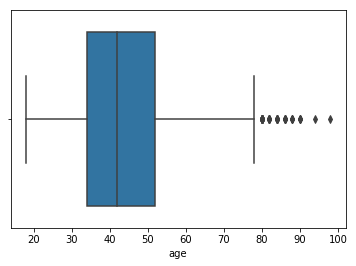

In [639]:
sns.boxplot('age', data = telecom)

In [640]:
median_age = telecom['age'].median()
print(median_age)

42.0


In [641]:
mean_age = telecom['age'].mean()
print(mean_age)

42.9560782091244


In [642]:
# As age seems to be an important attribute for this particular dataset, it does not seem very prudent to drop this column.
# Alternatively, we can drop only those rows where age is valued at 0. But, this constitutes around 30% of the records which may
# have an impact on our clustering later on.
# Looking at the boxplot of age distribution, we see there are a few outliers, though the mean and median are roughly the same.
# So, for all such 0-age values, (which are currenly represented as NaN), we will replace these with the median values.

In [643]:
telecom.columns

Index(['customer', 'age', 'marriageStatus', 'children', 'income',
       'numHandsets', 'handsetAge', 'smartPhone', 'currentHandsetPrice',
       'creditRating', 'homeOwner', 'creditCard', 'avgBill', 'avgMins',
       'avgrecurringCharge', 'avgOverBundleMins', 'avgRoamCalls',
       'callMinutesChangePct', 'billAmountChangePct', 'avgReceivedMins',
       'avgOutCalls', 'avgInCalls', 'peakOffPeakRatio',
       'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lifeTime',
       'lastMonthCustomerCareCalls', 'numRetentionCalls',
       'numRetentionOffersAccepted', 'newFrequentNumbers', 'churn'],
      dtype='object')

In [644]:
telecom['age'] = telecom['age'].replace(np.nan, median_age)

In [645]:
# We can drop the customer column as it does not have any predictive value.

In [646]:
telecom.drop(['customer'], axis = 1, inplace = True)

In [647]:
telecom.head()

,age,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,26.0,yes,true,6,1,1812,false,0.00,C,true,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,false
1,36.0,yes,true,9,4,544,true,79.99,A,false,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,false
2,74.0,yes,false,7,2,138,true,29.99,A,false,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,false
3,30.0,no,false,6,3,122,true,9.99,C,false,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,false
4,32.0,yes,false,7,8,10,true,129.99,A,false,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,false


In [648]:
# Separating the Numeric and Categorical datatypes:

In [649]:
telecom.dtypes

age                           float64
marriageStatus                 object
children                       object
income                          int64
numHandsets                     int64
handsetAge                      int64
smartPhone                     object
currentHandsetPrice           float64
creditRating                   object
homeOwner                      object
creditCard                     object
avgBill                       float64
avgMins                       float64
avgrecurringCharge            float64
avgOverBundleMins             float64
avgRoamCalls                  float64
callMinutesChangePct          float64
billAmountChangePct           float64
avgReceivedMins               float64
avgOutCalls                   float64
avgInCalls                    float64
peakOffPeakRatio              float64
peakOffPeakRatioChangePct     float64
avgDroppedCalls               float64
lifeTime                        int64
lastMonthCustomerCareCalls    float64
numRetention

In [650]:
cols = telecom.columns
num_cols = telecom._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [651]:
print(num_cols)

Index(['age', 'income', 'numHandsets', 'handsetAge', 'currentHandsetPrice',
       'avgBill', 'avgMins', 'avgrecurringCharge', 'avgOverBundleMins',
       'avgRoamCalls', 'callMinutesChangePct', 'billAmountChangePct',
       'avgReceivedMins', 'avgOutCalls', 'avgInCalls', 'peakOffPeakRatio',
       'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lifeTime',
       'lastMonthCustomerCareCalls', 'numRetentionCalls',
       'numRetentionOffersAccepted', 'newFrequentNumbers'],
      dtype='object')


In [652]:
print(cat_cols)

['creditRating', 'creditCard', 'marriageStatus', 'children', 'smartPhone', 'homeOwner', 'churn']


In [653]:
numerical_features = ['age', 'income', 'numHandsets', 'handsetAge', 'currentHandsetPrice',
       'avgBill', 'avgMins', 'avgrecurringCharge', 'avgOverBundleMins',
       'avgRoamCalls', 'callMinutesChangePct', 'billAmountChangePct',
       'avgReceivedMins', 'avgOutCalls', 'avgInCalls', 'peakOffPeakRatio',
       'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lifeTime',
       'lastMonthCustomerCareCalls', 'numRetentionCalls',
       'numRetentionOffersAccepted', 'newFrequentNumbers']

In [654]:
categorical_features = ['creditRating', 'creditCard', 'marriageStatus', 'children', 'smartPhone', 'homeOwner', 'churn']

In [655]:
numerical_features

['age',
 'income',
 'numHandsets',
 'handsetAge',
 'currentHandsetPrice',
 'avgBill',
 'avgMins',
 'avgrecurringCharge',
 'avgOverBundleMins',
 'avgRoamCalls',
 'callMinutesChangePct',
 'billAmountChangePct',
 'avgReceivedMins',
 'avgOutCalls',
 'avgInCalls',
 'peakOffPeakRatio',
 'peakOffPeakRatioChangePct',
 'avgDroppedCalls',
 'lifeTime',
 'lastMonthCustomerCareCalls',
 'numRetentionCalls',
 'numRetentionOffersAccepted',
 'newFrequentNumbers']

In [656]:
categorical_features

['creditRating',
 'creditCard',
 'marriageStatus',
 'children',
 'smartPhone',
 'homeOwner',
 'churn']

## Descriptive Statistics

### Numerical Features

In [657]:
telecom[numerical_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,10000.0,42.674800,10.392509,18.000000,38.000000,42.000000,48.000000,98.000000
income,10000.0,4.293600,3.139902,0.000000,0.000000,5.000000,7.000000,9.000000
numHandsets,10000.0,1.804500,1.345088,1.000000,1.000000,1.000000,2.000000,21.000000
handsetAge,10000.0,390.171700,257.076656,-5.000000,210.000000,339.000000,525.000000,1812.000000
currentHandsetPrice,10000.0,35.730696,57.072922,0.000000,0.000000,0.000000,59.990000,499.990000
avgBill,10000.0,58.927600,43.889815,0.000000,33.327500,49.205000,71.762500,584.230000
avgMins,10000.0,521.170645,540.435285,0.000000,150.627500,359.625000,709.187500,6336.250000
avgrecurringCharge,10000.0,46.236537,23.964960,0.000000,30.000000,44.990000,59.990000,337.980000
avgOverBundleMins,10000.0,42.392670,106.374374,0.000000,0.000000,3.000000,43.750000,4320.750000
avgRoamCalls,10000.0,1.186048,6.048811,0.000000,0.000000,0.000000,0.260000,177.990000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B344CD7048>,
      dtype=object)

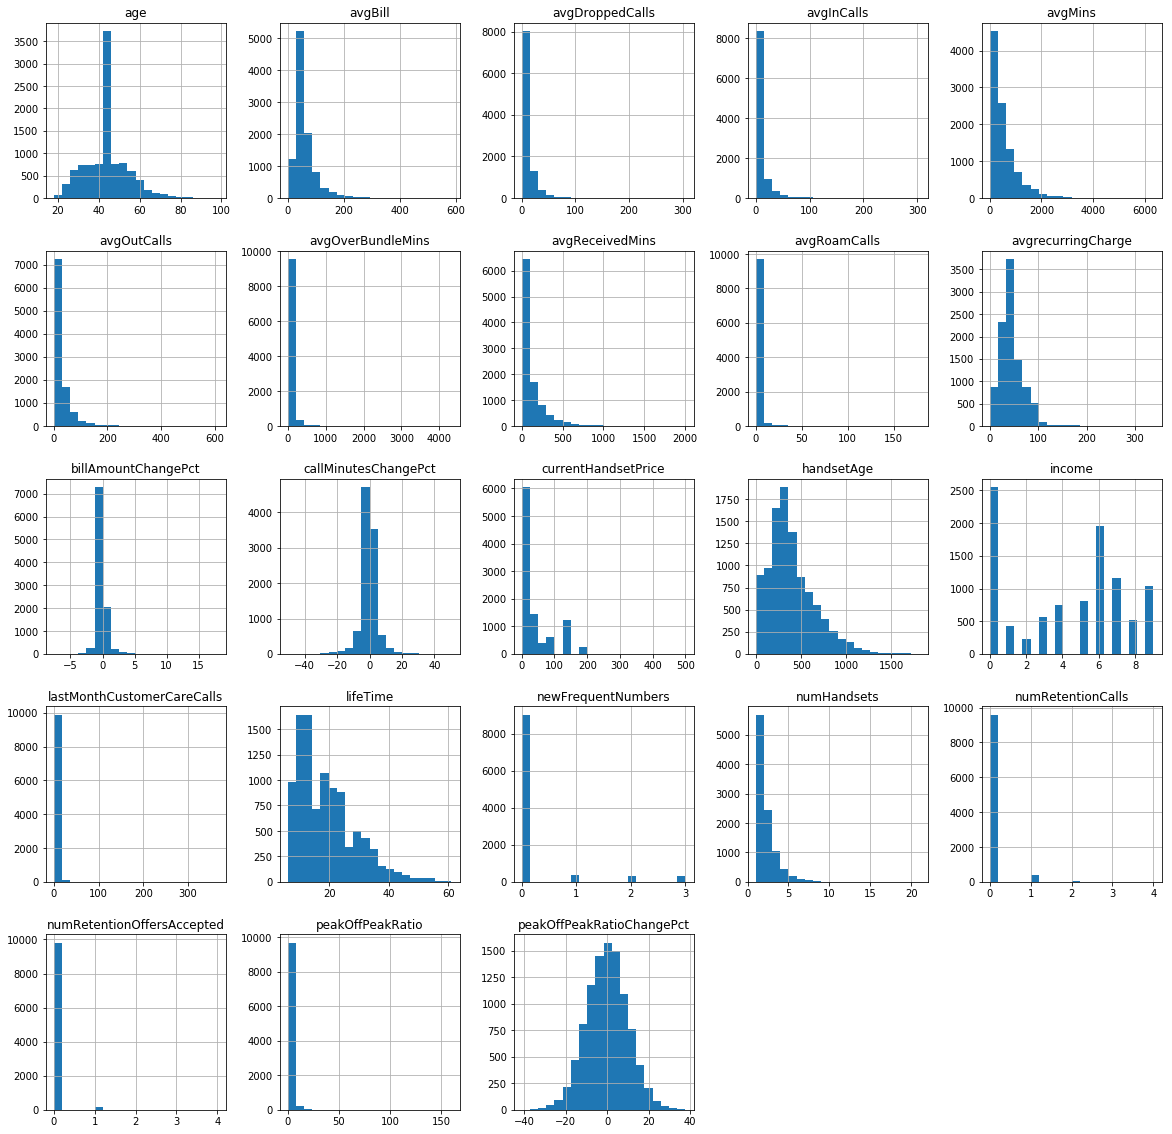

In [658]:
telecom[numerical_features].hist(bins = 20, figsize = (20, 20))

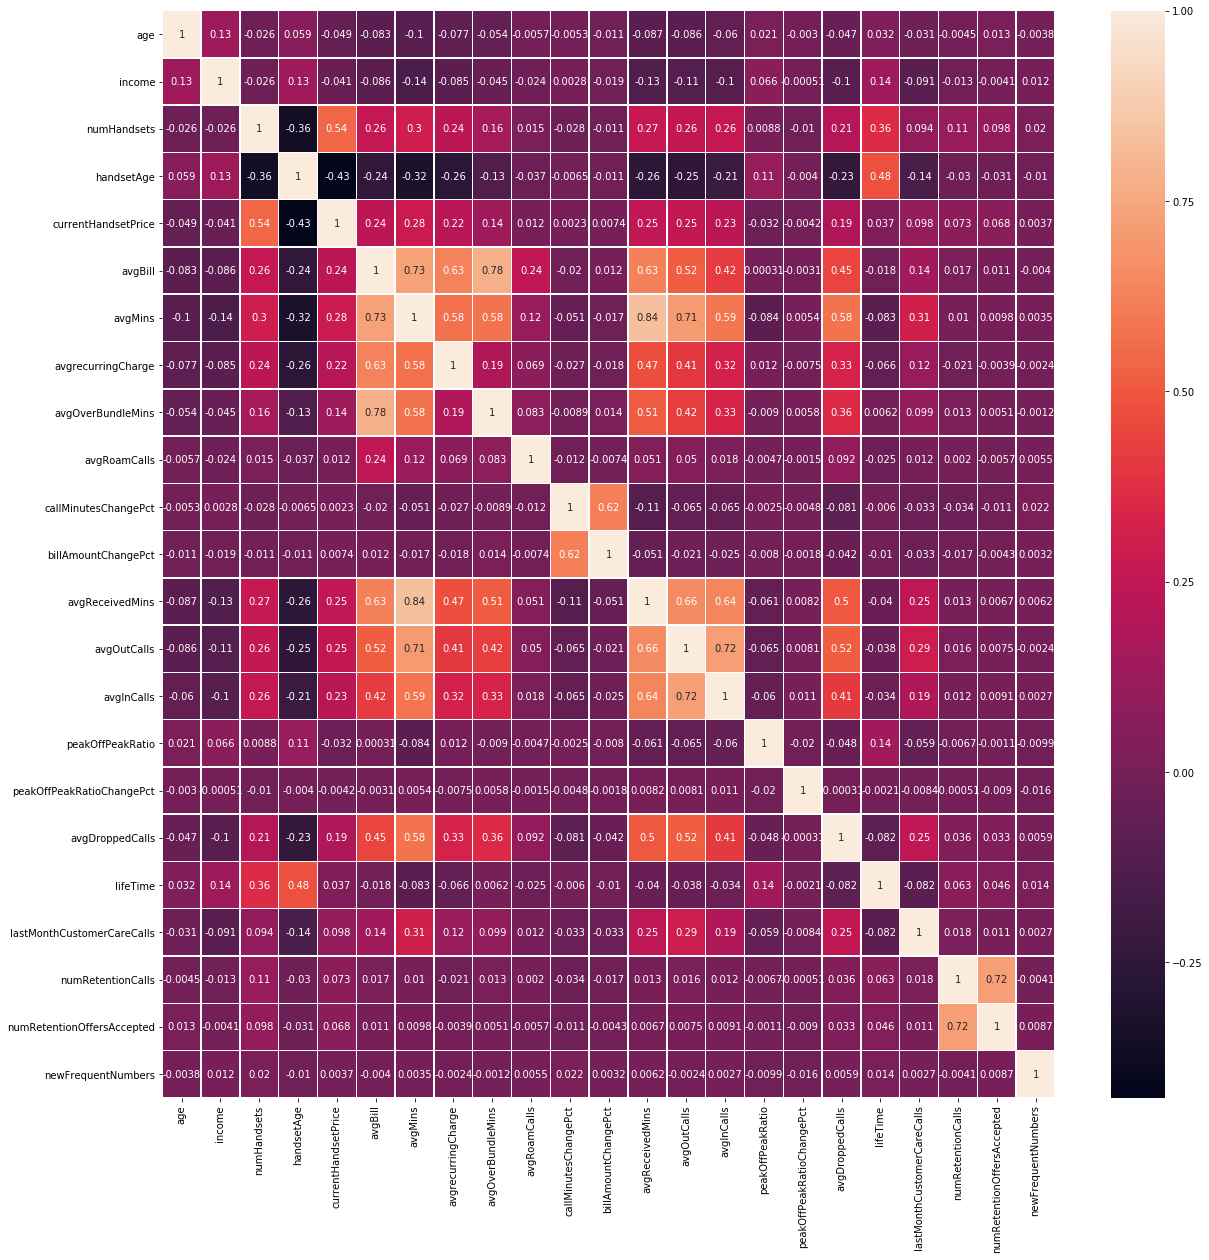

In [659]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(telecom[numerical_features].corr(), annot=True, linewidths=.5, ax=ax)

In [660]:
# We notice from the heatmap that there is only one signification correlation (0.84) between 'avgMins'(Avg monthly call minutes)
# and 'avgReceivedMins' (Avg number of in-call minutes received by the customer).

### Target Variable distribution

In [661]:
# As most of the categorical columns have 'True' & 'False' values as their categories, we will replace the target variable
# description as True -> Yes & False -> No. This will help in better understanding the plots.

In [662]:
telecom['churn'].replace(' true', 'Yes', inplace = True)
telecom['churn'].replace(' false', 'No', inplace = True)

In [663]:
telecom['churn'].value_counts()

Yes    5000
No     5000
Name: churn, dtype: int64

In [664]:
# There is no problem of data imbalance in the dataset.

### Categorical Features

In [665]:
telecom['creditCard'].value_counts()

 true     6537
 false    3146
 t         105
 no        100
 f          61
 yes        51
Name: creditCard, dtype: int64

In [666]:
# Under creditCard, we see that there are six different values present. We will be replacing 'f' and 'no' with 'false'
# and 't' and 'yes' with 'true'.

In [667]:
telecom['creditCard'].replace(' true', 'true', inplace = True) # To remove the whitespace
telecom['creditCard'].replace(' false', 'false', inplace = True)  # To remove the whitespace
telecom['creditCard'].replace(' f', 'false', inplace = True)
telecom['creditCard'].replace(' no', 'false', inplace = True)
telecom['creditCard'].replace(' t', 'true', inplace = True)
telecom['creditCard'].replace(' yes', 'true', inplace = True)
telecom['creditCard'].value_counts()

true     6693
false    3307
Name: creditCard, dtype: int64

In [668]:
categorical_features

['creditRating',
 'creditCard',
 'marriageStatus',
 'children',
 'smartPhone',
 'homeOwner',
 'churn']

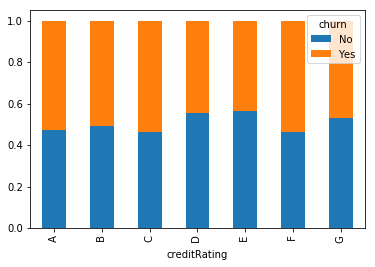

In [669]:
ct = pd.crosstab(telecom.creditRating, telecom.churn).apply(lambda r: r/r.sum(), axis=1)
ct.plot.bar(stacked = True)

In [670]:
# The above stacked bar chart shows that for different credit ratings of a customer, there is variation among the
# % of customer churn. This seems to be a good indicator.

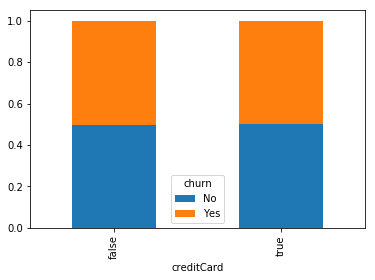

In [671]:
ct = pd.crosstab(telecom.creditCard, telecom.churn).apply(lambda r: r/r.sum(), axis=1)
ct.plot.bar(stacked = True)

In [672]:
# We can see that the % od customer churn for people with / without Credit Card is roughly the same indicating low predictive
# power of this variable. It may be a good idea to drop this attribute for further analysis.

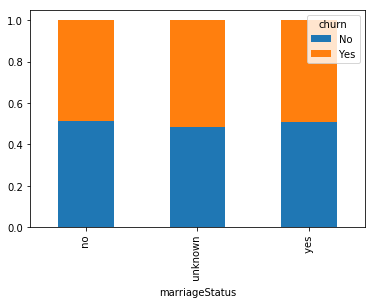

In [673]:
ct = pd.crosstab(telecom.marriageStatus, telecom.churn).apply(lambda r: r/r.sum(), axis=1)
ct.plot.bar(stacked = True)

In [674]:
# Based on the similar reasoning as above, the customer churn % seems to be roughly the same across the 3 categories of marital
# status. It may be wise to drop this attribute as well.

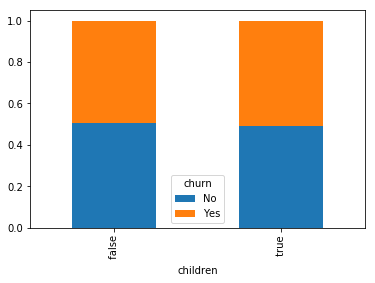

In [675]:
ct = pd.crosstab(telecom.children, telecom.churn).apply(lambda r: r/r.sum(), axis=1)
ct.plot.bar(stacked = True)

In [676]:
# Based on the similar reasoning as above, the customer churn % seems to be roughly the same whether or not the Customer has
# children. It may be wise to drop this attribute as well.

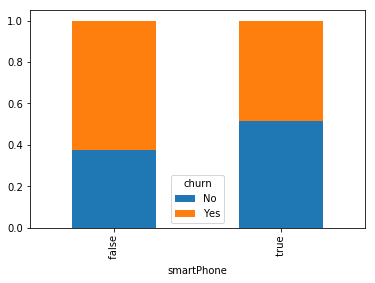

In [677]:
ct = pd.crosstab(telecom.smartPhone, telecom.churn).apply(lambda r: r/r.sum(), axis=1)
ct.plot.bar(stacked = True)

In [678]:
# There is a slight variation in customer churn % across the two categories of smartphone owners.

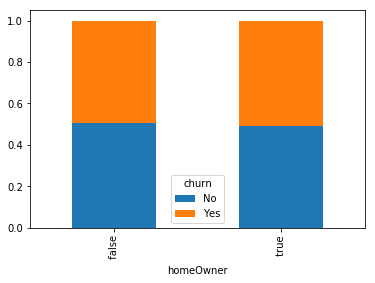

In [679]:
ct = pd.crosstab(telecom.homeOwner, telecom.churn).apply(lambda r: r/r.sum(), axis=1)
ct.plot.bar(stacked = True)

In [680]:
# As the customer churn % is similar across the two categories, we will drop this attribute as well.

In [681]:
# Based on the above analysis, we have decided to drop these attributes from our dataset for further analysis.

In [682]:
telecom.drop(['creditCard', 'marriageStatus', 'children', 'homeOwner'], axis = 1, inplace = True)

In [683]:
telecom.head()

,age,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,avgBill,avgMins,avgrecurringCharge,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,26.0,6,1,1812,false,0.00,C,38.00,7.50,38.00,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,No
1,36.0,9,4,544,true,79.99,A,35.30,24.25,34.98,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,No
2,74.0,7,2,138,true,29.99,A,21.15,45.50,16.99,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,No
3,30.0,6,3,122,true,9.99,C,91.18,332.75,75.00,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,No
4,32.0,7,8,10,true,129.99,A,93.02,1348.25,75.00,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,No


In [684]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [685]:
telecom[numerical_features] = standardize(telecom[numerical_features])
import scipy as sp
telecom = telecom[(np.abs(sp.stats.zscore(telecom[numerical_features])) < 3).all(axis=1)]

In [686]:
telecom.head()

,age,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,avgBill,avgMins,avgrecurringCharge,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
18,-0.064935,-1.367500,2.375800,1.465894,true,-0.100590,A,0.047904,-0.716904,0.991224,...,-0.398169,-0.266009,-0.267964,-0.537896,2.930529,-0.301934,-0.197471,-0.133419,-0.304103,No
22,-0.064935,0.224986,2.375800,-1.132683,true,-0.451037,A,0.828079,0.544180,2.034466,...,0.224145,0.300287,-0.437311,0.673538,2.930529,-0.128151,-0.197471,-0.133419,-0.304103,No
36,-0.064935,-1.367500,0.888834,1.146907,false,-0.100590,A,-0.493706,-0.717366,-0.052018,...,-0.435508,-0.063006,-1.794544,-0.470594,2.930529,-0.301934,-0.197471,-0.133419,-0.304103,No
41,-0.064935,1.498975,0.145351,-0.634752,true,-0.100590,A,0.171629,-0.152053,0.991224,...,-0.473413,-0.253601,-1.044812,-0.179177,2.930529,-0.301934,-0.197471,-0.133419,-0.304103,No
52,-0.064935,1.498975,0.145351,0.034343,true,-0.100590,A,0.386952,-0.443962,1.617169,...,-0.265786,0.828847,-0.476849,-0.515686,2.618369,-0.244586,-0.197471,-0.133419,1.255401,No


In [687]:
telecom.columns

Index(['age', 'income', 'numHandsets', 'handsetAge', 'smartPhone',
       'currentHandsetPrice', 'creditRating', 'avgBill', 'avgMins',
       'avgrecurringCharge', 'avgOverBundleMins', 'avgRoamCalls',
       'callMinutesChangePct', 'billAmountChangePct', 'avgReceivedMins',
       'avgOutCalls', 'avgInCalls', 'peakOffPeakRatio',
       'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lifeTime',
       'lastMonthCustomerCareCalls', 'numRetentionCalls',
       'numRetentionOffersAccepted', 'newFrequentNumbers', 'churn'],
      dtype='object')

In [688]:
X = telecom.drop(['churn'], axis = 1)

In [690]:
X.head()

,age,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,avgBill,avgMins,avgrecurringCharge,...,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers
18,-0.064935,-1.367500,2.375800,1.465894,true,-0.100590,A,0.047904,-0.716904,0.991224,...,-0.557393,-0.398169,-0.266009,-0.267964,-0.537896,2.930529,-0.301934,-0.197471,-0.133419,-0.304103
22,-0.064935,0.224986,2.375800,-1.132683,true,-0.451037,A,0.828079,0.544180,2.034466,...,-0.248958,0.224145,0.300287,-0.437311,0.673538,2.930529,-0.128151,-0.197471,-0.133419,-0.304103
36,-0.064935,-1.367500,0.888834,1.146907,false,-0.100590,A,-0.493706,-0.717366,-0.052018,...,-0.389156,-0.435508,-0.063006,-1.794544,-0.470594,2.930529,-0.301934,-0.197471,-0.133419,-0.304103
41,-0.064935,1.498975,0.145351,-0.634752,true,-0.100590,A,0.171629,-0.152053,0.991224,...,-0.295504,-0.473413,-0.253601,-1.044812,-0.179177,2.930529,-0.301934,-0.197471,-0.133419,-0.304103
52,-0.064935,1.498975,0.145351,0.034343,true,-0.100590,A,0.386952,-0.443962,1.617169,...,0.134342,-0.265786,0.828847,-0.476849,-0.515686,2.618369,-0.244586,-0.197471,-0.133419,1.255401


In [693]:
y = telecom[['churn']]

In [694]:
y.head()

,churn
18,No
22,No
36,No
41,No
52,No


In [695]:
X = pd.get_dummies(data = X)

In [696]:
X.head()

,age,income,numHandsets,handsetAge,currentHandsetPrice,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,...,newFrequentNumbers,smartPhone_ false,smartPhone_ true,creditRating_ A,creditRating_ B,creditRating_ C,creditRating_ D,creditRating_ E,creditRating_ F,creditRating_ G
18,-0.064935,-1.367500,2.375800,1.465894,-0.100590,0.047904,-0.716904,0.991224,-0.398543,-0.196089,...,-0.304103,0,1,1,0,0,0,0,0,0
22,-0.064935,0.224986,2.375800,-1.132683,-0.451037,0.828079,0.544180,2.034466,-0.398543,-0.196089,...,-0.304103,0,1,1,0,0,0,0,0,0
36,-0.064935,-1.367500,0.888834,1.146907,-0.100590,-0.493706,-0.717366,-0.052018,-0.398543,-0.148144,...,-0.304103,1,0,1,0,0,0,0,0,0
41,-0.064935,1.498975,0.145351,-0.634752,-0.100590,0.171629,-0.152053,0.991224,-0.316282,-0.196089,...,-0.304103,0,1,1,0,0,0,0,0,0
52,-0.064935,1.498975,0.145351,0.034343,-0.100590,0.386952,-0.443962,1.617169,-0.398543,-0.196089,...,1.255401,0,1,1,0,0,0,0,0,0


## KMeans Clustering

In [749]:
from sklearn.cluster import KMeans

In [750]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

In [751]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X)
    prediction=model.predict(X)
    meanDistortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

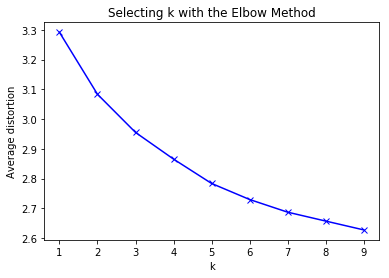

In [752]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [753]:
# Here, the bends are not coming out clearly. Let us look at clusters 2, 3 and 4.

In [754]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(X)
prediction=final_model.predict(X)

In [755]:
#Append the prediction 
telecom["Cluster"] = prediction

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B385548DD8>,
      dtype=object)

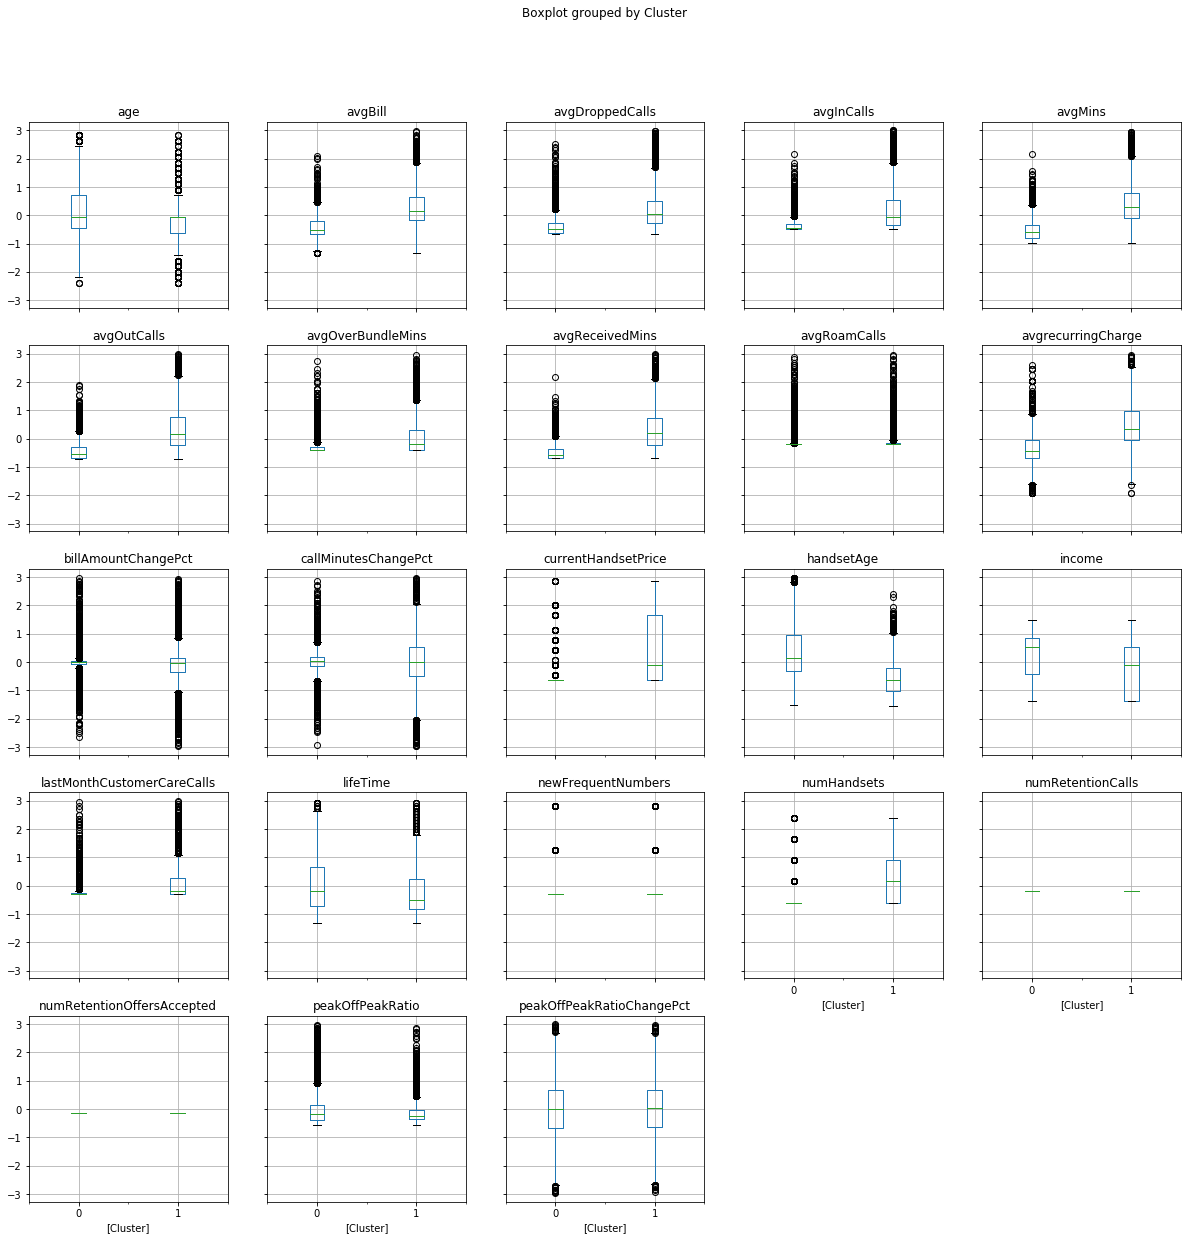

In [756]:
telecom.boxplot(by = 'Cluster',figsize=(20, 20))

In [757]:
# For K = 3
final_model=KMeans(3)
final_model.fit(X)
prediction=final_model.predict(X)

In [758]:
#Append the prediction 
telecom["Cluster"] = prediction

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B387319160>,
      dtype=object)

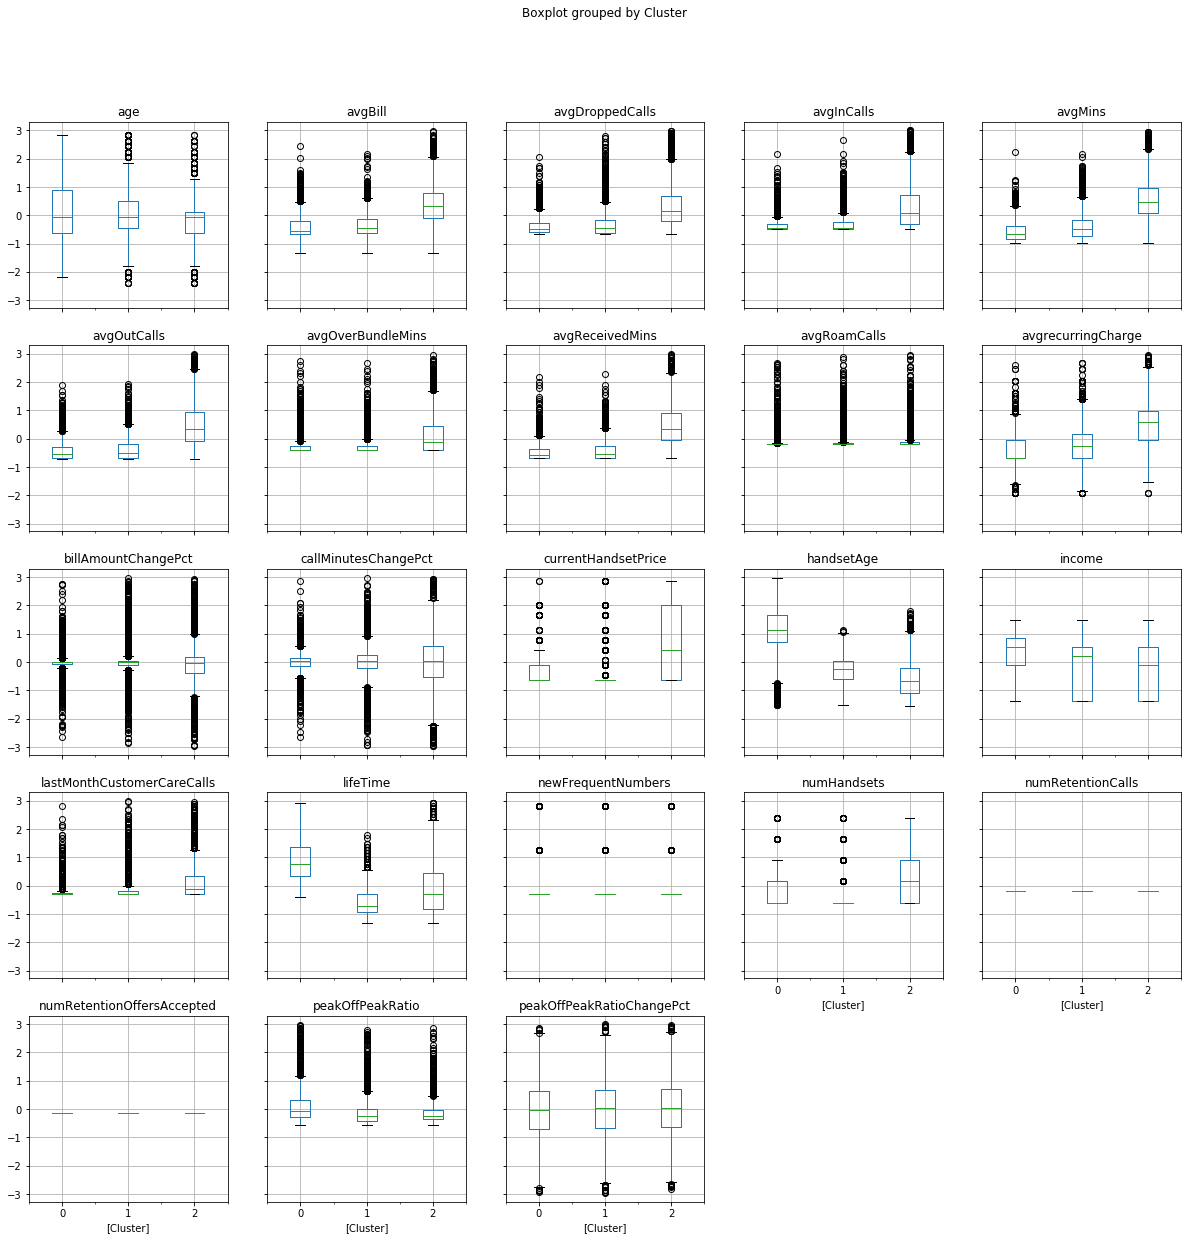

In [759]:
telecom.boxplot(by = 'Cluster',figsize=(20, 20))

In [760]:
# For K = 4
final_model=KMeans(4)
final_model.fit(X)
prediction=final_model.predict(X)

In [761]:
#Append the prediction 
telecom["Cluster"] = prediction

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3898AC128>,
      dtype=object)

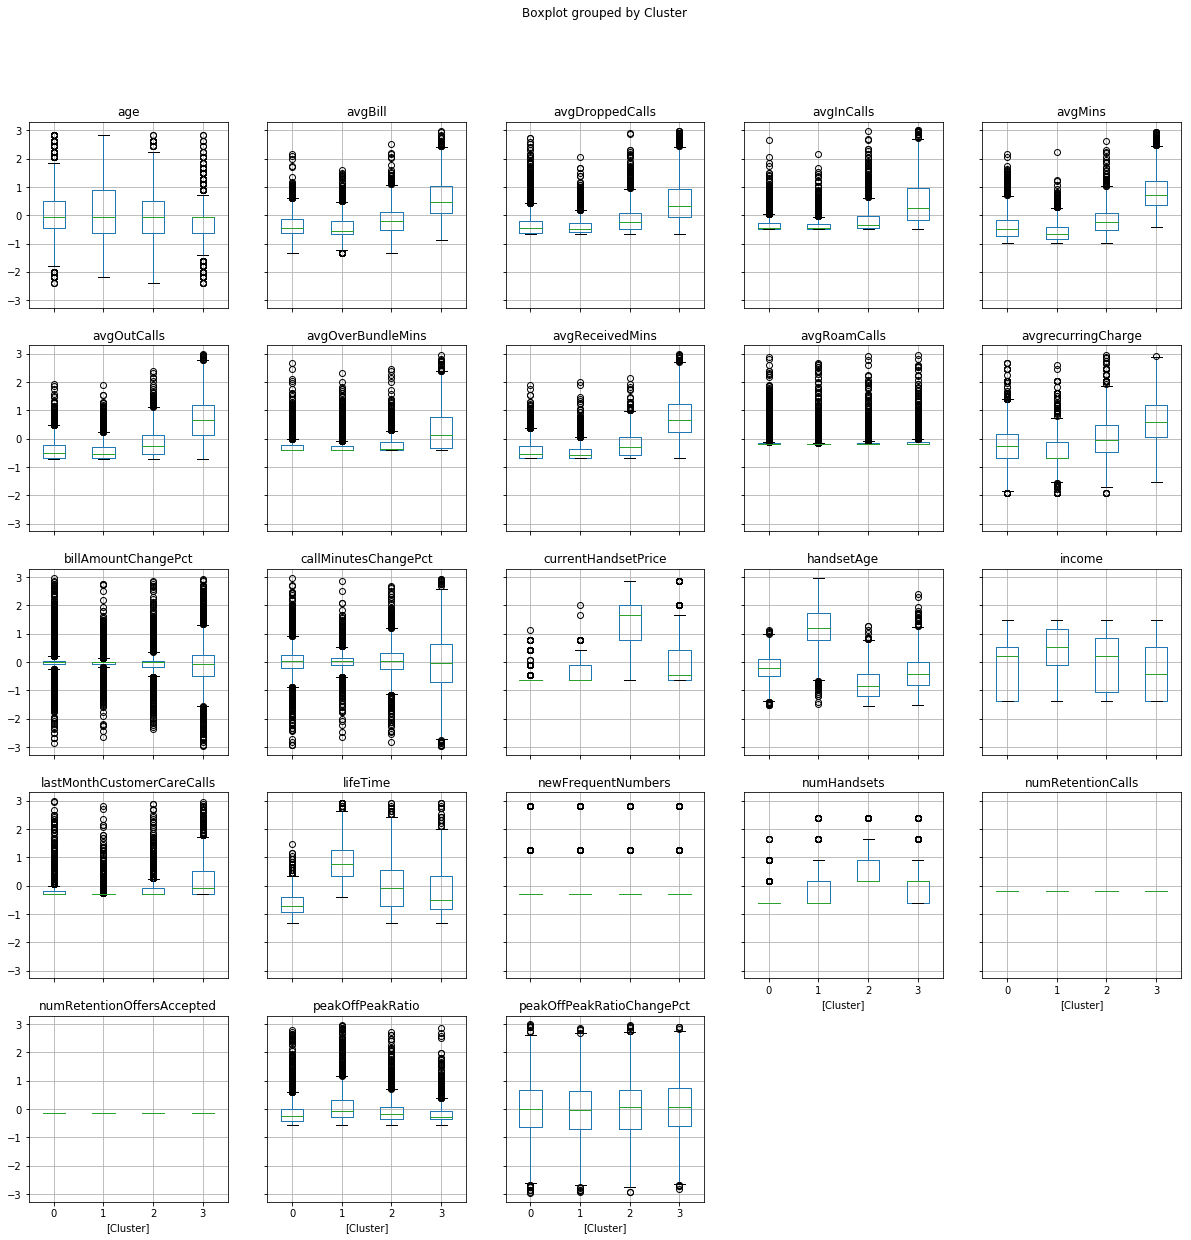

In [762]:
telecom.boxplot(by = 'Cluster',figsize=(20, 20))

### We can see from the above boxplots that Kmeans does the best at n_clusters = 3. It is able to separate the cluster on attributes such as avgBill,avgDroppedCalls, avgMins, avgOutCalls, avgReceivedMins, avgRecurringCharge.